# Decomposições

****

## PCA

O PCA (_Principal Component Analysis_) é uma técnica não-supervisionada, não requer uma variável objetivo, que converte o conjunto de dados, com _features_ possivelmente correlacionadas, em _features_ descorrelacionadas, chamadas de _principal components_.

O algoritmo é uma transformação linear que transforma os dados para um novo sistema de coordenadas, onde as dimensões são ordenadas a partir de suas variãncias. Isso significa que a maior parte da informação de um _dataset_ estará codificada nas primeiras dimensões. Essa transformação pode ser usada para reduzir a dimensionalidade de um dataset, descorrelacionando _features_ e removendo componentes que não possuem mais relevância.

Podemos implementar esse algoritmo usando os seguintes passos:
1. centralizar os dados, isso é feito subtraindo subtraindo a média de cada dimensão: $z = X - E[X]$
2. computar a matrix de covariância dos dados centralizados transpostos: $cov = E[(X-E[X])^T(X-E[X])]$
3. calcular os autovetores e autovalores da matrix de covariância: $cov \cdot v - \lambda \cdot v = 0 $
4. ordenar os autovetores de forma decrescente a partir dos autovalores, aqui, os autovalores expressam a representatividade de cada uma das features
5. aplicar a transformação dos autovetores aos dados centralizados: $z \cdot v$
6. escolher as $n$ novas _features_ mais representativas

O PCA é sensível à variância das variáveis. Isso significa que uma variável com variância muito grande, irá dominar variáveis com variãncia menor, podendo levar à um resultado enviesado. O passo 1 é fundamental para o algoritmo, os dados devem vir normalizados previamente, mas caso não sejam, eles precisam ser centralizados.

O objetivo do passo 2 é entender como as variáveis estão correlacionadas entre si. Como os componentes principais são novas variáveis contruídas a partir de uma combinação linear das variáveis inciais, essas combinações serão feitas de tal forma que as novas variáveis sejam descorrelaciondas e a maior parte de informação seja comprimida no primeiro componente.

No passo 3, os autovetores da matrix de covariância vão representar a direção no eixo em que existe maior variãncia. Esse passo já computa a nossa matrix de transformação, que será usada posteriormente.

O passo 4 ordena os autovetores a partir dos seus autovalores. Assim, garantimos que os primeiros autovetores possuem a maior significância.

### Sua tarefa

O seu trabalho hoje é implementar o algoritmo PCA, de tal forma que ele seja uma classe em python capaz de ser utilizado em um objeto _Pipeline_. O _Pipeline_ é um objeto que condensa modelos de normalização, redução de dimensionalidade e classificadores em apenas um objeto, facilitando o manuseio dos algoritmos.

Após implementar, você deve utiliza-lo para visualizar o dataset ``wine``, do _sklearn_ em apenas duas dimensões. Além de utilizar um _Pipeline_, combinando seu PCA com um classificador.


Dicas:
- crie sua classe herdando de ``sklearn.base.BaseEstimator`` e implementando os métodos ``fit`` e ``transform``
- use ``np.cov`` para criar a matriz de covariâncias
- use ``np.linalg.eig`` para transformar a matriz de covariâncias em autovetores e autovalores
- use ``np.argsort`` para ordenar os autovalores

In [1]:
# Função para carregar nosso dataset
from sklearn.datasets import load_wine

# Função para separação dos dados
from sklearn.model_selection import train_test_split

# Bibliotecas de manipualção e visualização de dados
import matplotlib.pyplot as plt

# vamos carregar o dataset
X, y = load_wine(return_X_y=True, as_frame=True)

# vamos definir cores e simbolos para nossas classses
colors = {0: "steelblue", 1: "darkorange", 2: "mediumseagreen"}
markers = {0: "s", 1: "^", 2:"o"}

# vamos criar uma função para visualizar uma região 2d, dadas duas features
def plot_2d_space(X, y, f1, f2, colors=colors, markers=markers):
    plt.figure()
    labels = list(y.unique())
    labels.sort()

    lines = []
    for i in labels:
        line = plt.scatter(
            X[f1][y==i],
            X[f2][y==i], 
            c=colors[i], 
            marker=markers[i],
            label=i,
        )

        lines.append(line)

    plt.legend(handles=lines)
        
    plt.show()

In [3]:
## SUA CLASSE COM O PCA

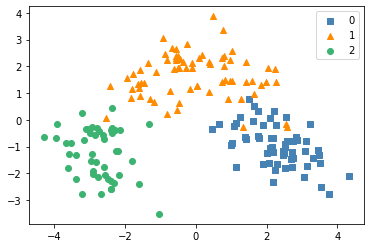

In [6]:
## VISUALIZAÇÃO DO DATASET EM DUAS DIMENSÕES

# dica: para utilizar a função plot_2d_space, crie um dataframe pandas assim: df = pd.DataFrame(new_X, columns=[0, 1]), e faça f0=0 e f1=1